<a href="https://colab.research.google.com/github/Juan1mera/dap-2024/blob/main/les05/rep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №5. Визуализация данных


Задача 1

Постройте два линейных графика функции y = (2/x) + 3 на одной оси координат, первый для диапазона x=[-10;0], а второй для x=[0;7].

*   Графики должны быть помещены на оси с пределами xlim(-10, 10) и ylim(-10, 10), иметь подписи к осям, легенду и заголовок.
*   Первый график должен быть красного цвета и нарисован штрихпунктирной линией
*   Второй график должен иметь цвет (1.0,0.2,0.3) и нарисован сплошной линией



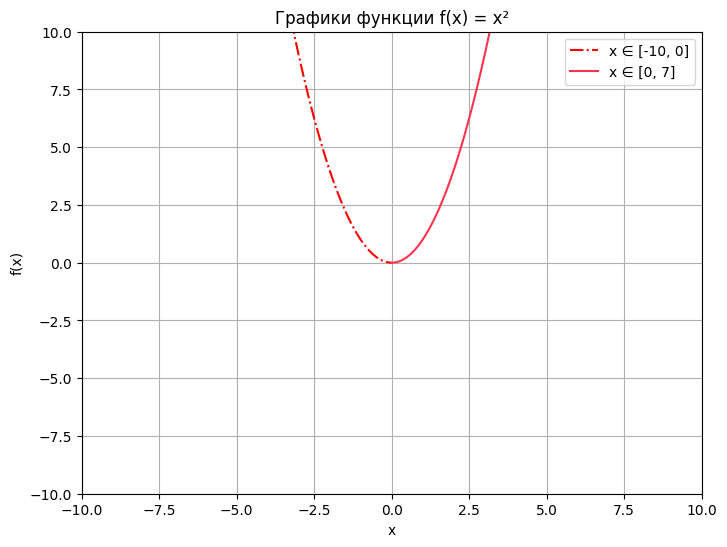

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x**2

# data for the two intervals
x1 = np.linspace(-10, 0, 100)
y1 = f(x1)

x2 = np.linspace(0, 7, 100)
y2 = f(x2)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x1, y1, color='red', linestyle='-.', label='x ∈ [-10, 0]')
plt.plot(x2, y2, color=(1.0, 0.2, 0.3), linestyle='-', label='x ∈ [0, 7]')

# Set axis limits, labels, title, and legend
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Графики функции f(x) = x²')
plt.legend()
plt.grid(True)
plt.show()

Задача 2

Постройте диаграмму рассеяния для набора данных titanic (файл ./data/titanic.csv).
*   По оси X - возврат пассажира (Age)
*   По оси Y - стоимость билета (Fare)
*   Для выживших пассажиров используется маркер зеленый круг (Survived)
*   Для не выживших пассажиров используется маркер красный крест (Survived)
*   График должен подписи к осям и легенду и заголовок

Данные для которых не указан возврат или стоимость билета должны быть исключены

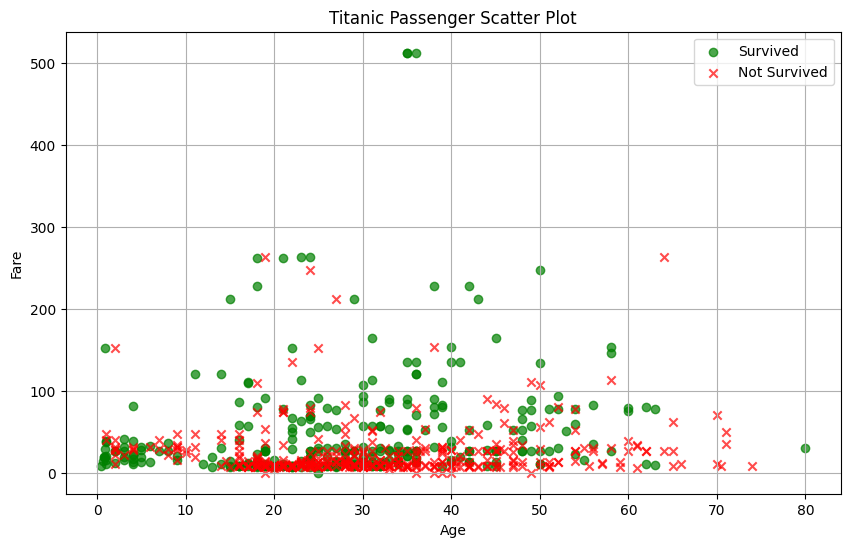

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

titanic_df = pd.read_csv('./titanic.csv')

titanic_clean = titanic_df.dropna(subset=['Age', 'Fare']) # drop rows where 'Age' or 'Fare' is NaN
survived = titanic_clean[titanic_clean['Survived'] == 1]
not_survived = titanic_clean[titanic_clean['Survived'] == 0]

plt.figure(figsize=(10, 6))
plt.scatter(survived['Age'], survived['Fare'], c='green', marker='o', label='Survived', alpha=0.7)
plt.scatter(not_survived['Age'], not_survived['Fare'], c='red', marker='x', label='Not Survived', alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Titanic Passenger Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()

Задача 3

Для первоначального анализа данных часто используются диаграммы рассеяния для всех признаков из набора данных. Это позволяет визуально увидеть зависимости между признаками и выбросы. Для набора данных iris постройте на одном холсте 16 диаграмм рассеяния показывающих зависимости между всеми признаками набора ('sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)')

*   Холст должен содержать 16 графиков на отдельных осях (см. иллюстрацию к статье в Википедия)
*   Цвет маркеров должен зависеть от вида ирисов (iris.target)
*   Графики должны иметь подписи к осям, легенду и общий заголовок







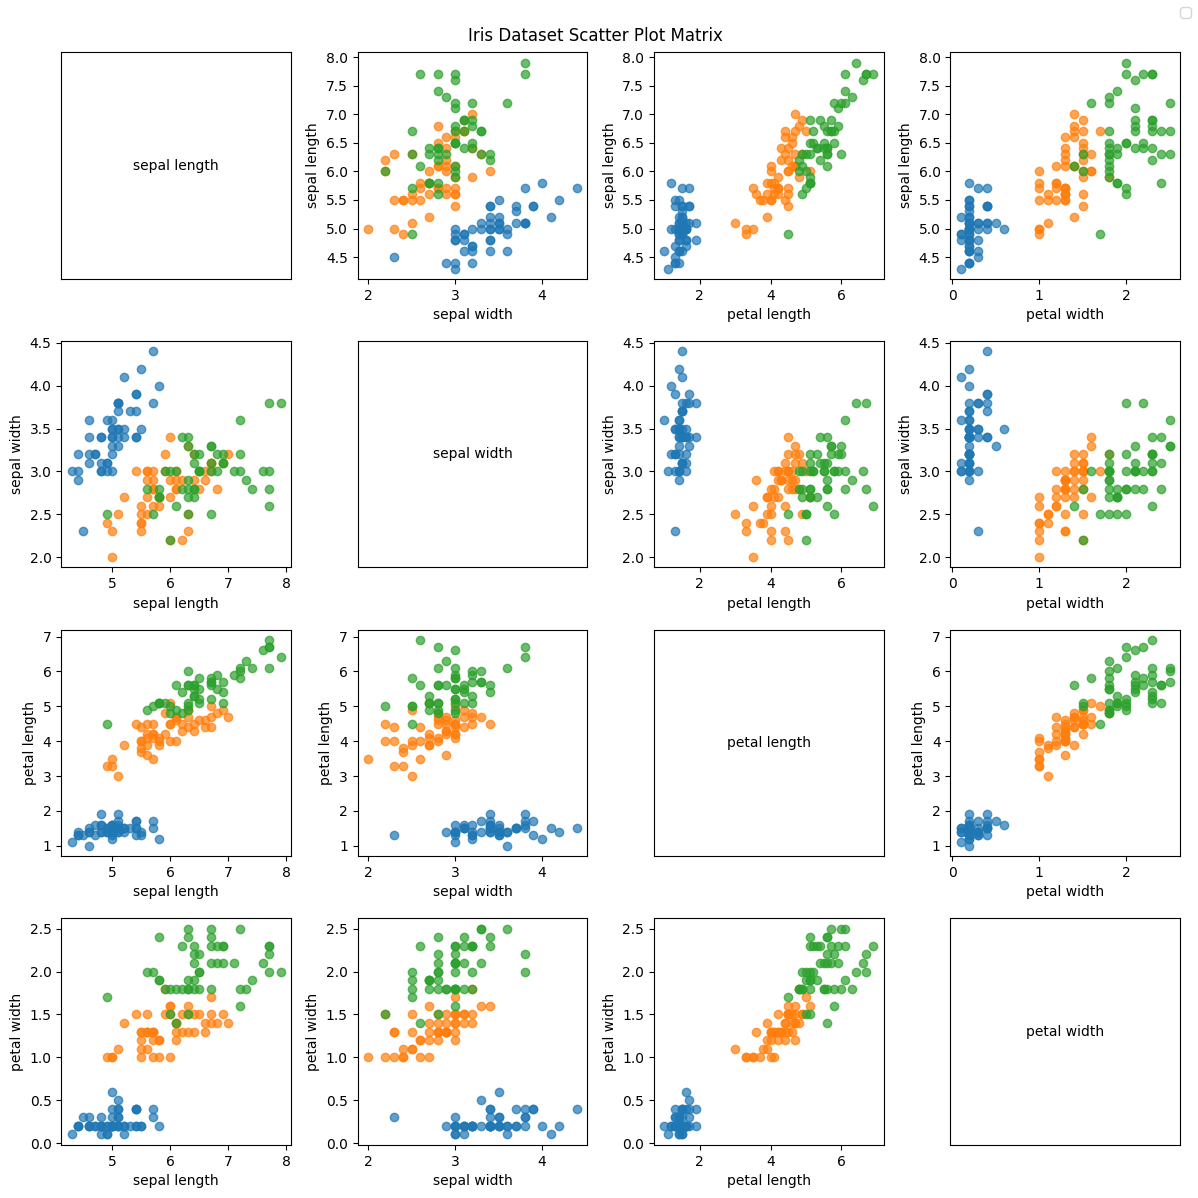

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
features = iris.feature_names
X = iris.data
y = iris.target
target_names = iris.target_names

# Create a 4x4 subplot grid
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
fig.suptitle('Iris Dataset Scatter Plot Matrix')

for i in range(4):
    for j in range(4):
        ax = axes[i, j]
        if i == j:
            # On the diagonal, you could plot a histogram or just leave it empty
            ax.text(0.5, 0.5, features[i].split(' (cm)')[0], transform=ax.transAxes,
                    ha='center', va='center')
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            for k, target_name in enumerate(target_names):
                ax.scatter(X[y == k, j], X[y == k, i], label=target_name, alpha=0.7)
            ax.set_xlabel(features[j].split(' (cm)')[0])
            ax.set_ylabel(features[i].split(' (cm)')[0])

# Create a single legend for the entire figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()

Задача 4

Постройте на одном холсте и разный осях следующие распределения для набора данных titanic (./data/titanic.csv):


*   Постройте гистограмму распределения пассажиров по возрасту (Age). Интервал 5 лет.

*   Постройте гистограмму распределения пассажиров женского пола по стоимости билетов (Fare). Подберите удобный интервал
*   График должен иметь подписи к осям, легенду и заголовок




Данные для которых не указан возраст или стоимость билета должны быть исключены

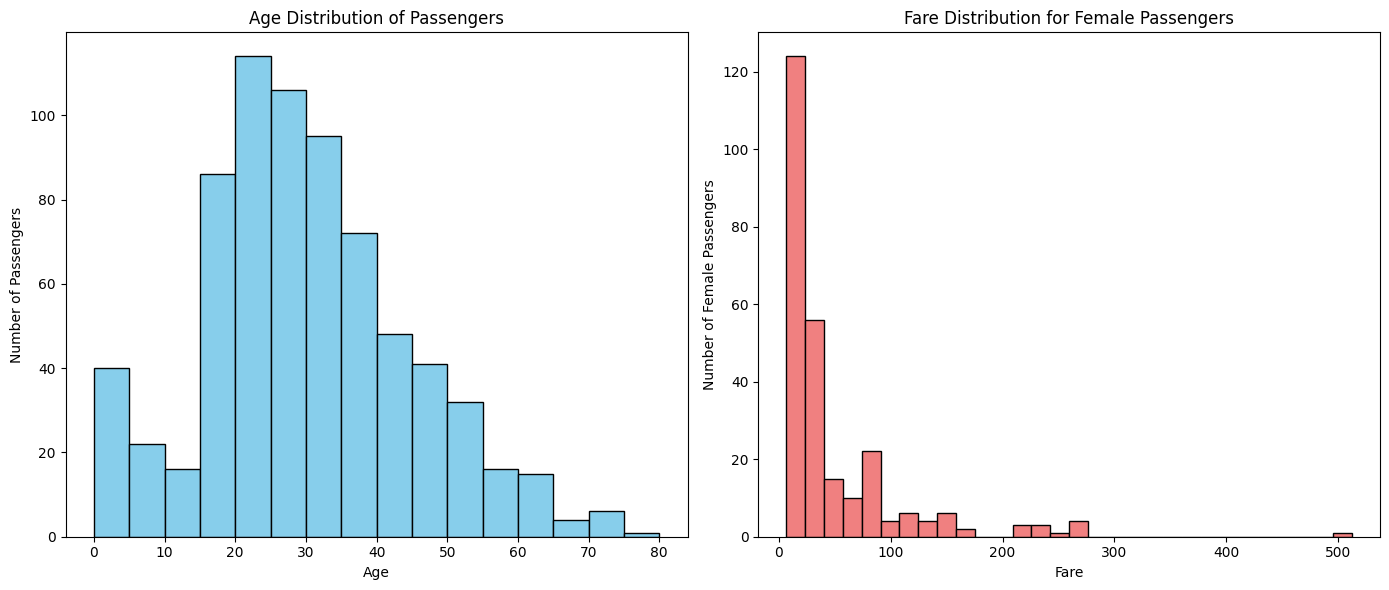

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

titanic_df = pd.read_csv('./titanic.csv')
titanic_clean = titanic_df.dropna(subset=['Age', 'Fare'])

females = titanic_clean[titanic_clean['Sex'] == 'female']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.hist(titanic_clean['Age'], bins=np.arange(0, titanic_clean['Age'].max() + 5, 5), color='skyblue', edgecolor='black')
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of Passengers')
ax1.set_title('Age Distribution of Passengers')

ax2.hist(females['Fare'], bins=30, color='lightcoral', edgecolor='black')
ax2.set_xlabel('Fare')
ax2.set_ylabel('Number of Female Passengers')
ax2.set_title('Fare Distribution for Female Passengers')

plt.tight_layout()
plt.show()

Задача 5

Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму:


*   Диаграмма должна быть вертикальной

*   По оси X - класс каюты пассажира (Pclass)
*   По оси Y - средняя стоимость за проезд для данного класса (Fare)


*   График должен иметь подписи к осям, легенду и заголовок


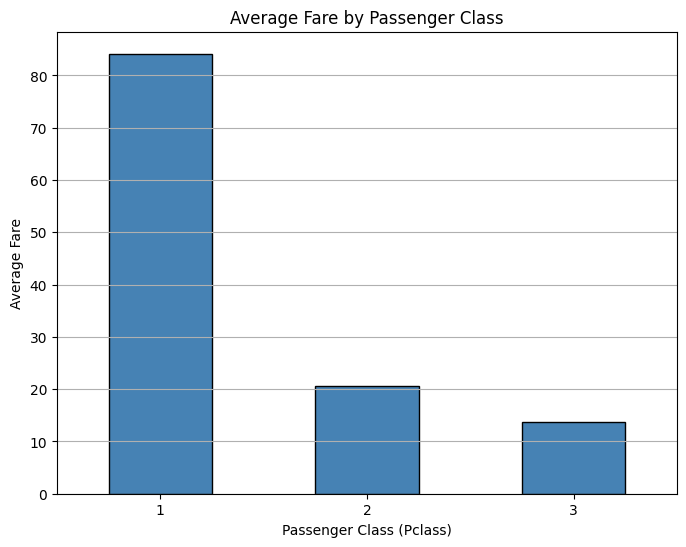

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

titanic_df = pd.read_csv('./titanic.csv')

avg_fare_by_class = titanic_df.groupby('Pclass')['Fare'].mean()

plt.figure(figsize=(8, 6))
avg_fare_by_class.plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Average Fare')
plt.title('Average Fare by Passenger Class')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Задача 6

Для набора данных для набора данных titanic (./data/titanic.csv) постройте следующую столбчатую диаграмму c накоплением:


*   Диаграмма должна быть вертикальной

*   По оси X - класс каюты пассажира (Pclass)
*   По оси Y - количество пассажиров с разбивкой по полу (Sex)


*   График должен иметь подписи к осям, легенду и заголовок







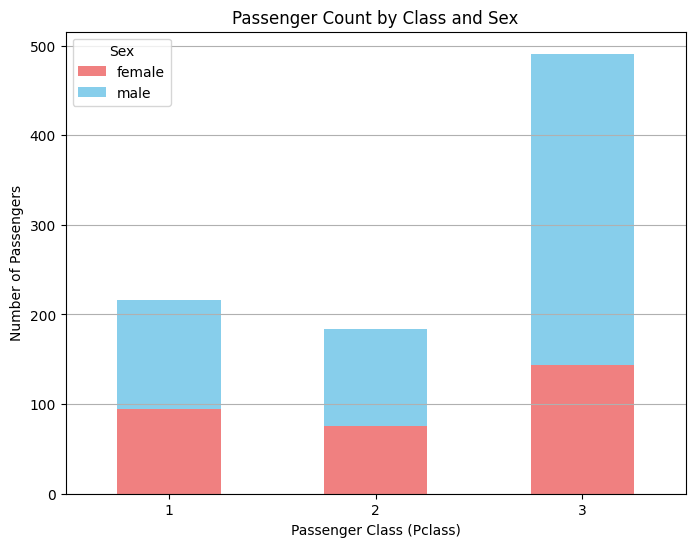

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
titanic_df = pd.read_csv('./titanic.csv')

passenger_count = pd.crosstab(titanic_df['Pclass'], titanic_df['Sex'])

ax = passenger_count.plot(kind='bar', stacked=True, figsize=(8, 6), color=['lightcoral', 'skyblue'])
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Number of Passengers')
plt.title('Passenger Count by Class and Sex')
plt.xticks(rotation=0)
plt.legend(title='Sex')
plt.grid(axis='y')
plt.show()

Задача 7

Для набора данных iris постройте круговую диаграмму


*   Диаграмма должна иметь 3 сектора отражающих долю ирисов данного вида в наборе

*   Сектор с максимальной долей долен быть выдвинут
*   График должен иметь подписи к осям, легенду и заголовок


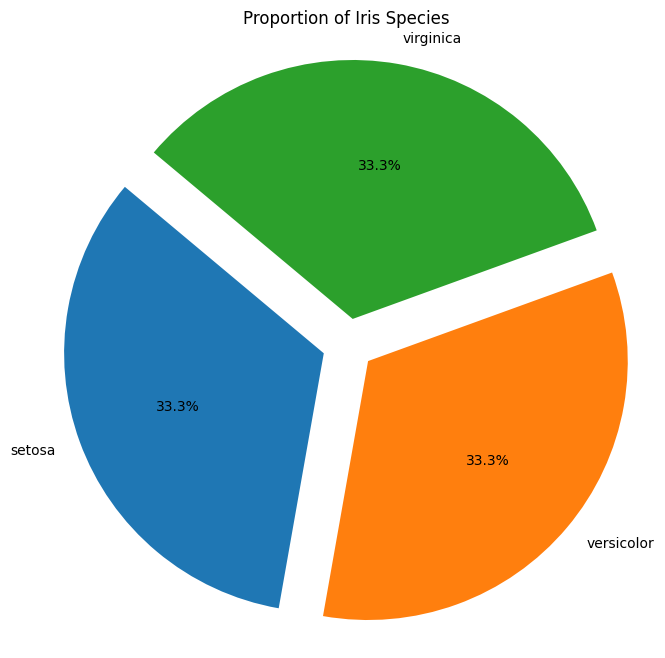

In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
target_names = iris.target_names
counts = [sum(iris.target == i) for i in range(len(target_names))]

explode = [0.1 if count == max(counts) else 0 for count in counts]

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=target_names, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Proportion of Iris Species')
plt.axis('equal')
plt.show()

Задача 8

Использую библиотеку Seaborn постройте гистограмму для возраста пассажиров "Титаника"

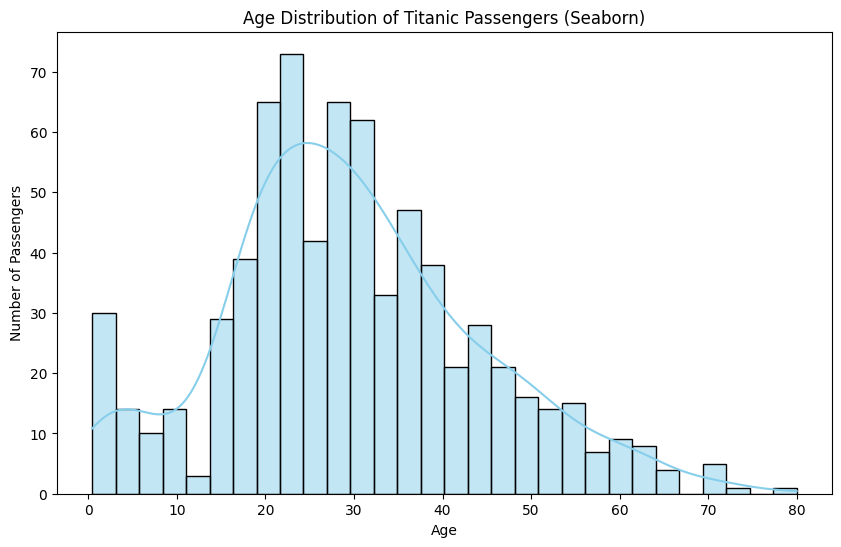

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

titanic_df = pd.read_csv('./titanic.csv')
titanic_clean = titanic_df.dropna(subset=['Age'])

plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_clean, x='Age', bins=30, kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Age Distribution of Titanic Passengers (Seaborn)')
plt.show()

# Вопросы и ответы по визуализации данных с использованием Matplotlib и анализу наборов данных


**1. Для чего используется диаграмма рассеяния?**  
Диаграмма рассеяния (scatter plot) используется для визуализации взаимосвязи или корреляции между двумя числовыми переменными. Каждая точка представляет отдельное наблюдение с координатами по двум осям. Такой график помогает выявить закономерности, тренды, кластеры или выбросы (аномальные значения).


**2. Что такое гистограмма и чем она отличается от столбчатой диаграммы?**  
**Гистограмма** отображает распределение частот значений непрерывной числовой переменной, разбивая диапазон значений на интервалы («корзины» — bins). Столбики в гистограмме обычно расположены вплотную друг к другу, а их ширина соответствует размеру интервала.  
**Столбчатая диаграмма** (bar chart) используется для сравнения категориальных данных: каждый столбец соответствует отдельной категории, и между ними обычно есть промежутки. Таким образом, гистограммы показывают распределения, а столбчатые диаграммы — сравнения между категориями.


**3. Как задать цвет линии в линейном графике Matplotlib?**  
Цвет линии задаётся с помощью параметра `color` (или сокращённо `c`) в функции `plt.plot()`. Например:  
```python
plt.plot(x, y, color='red')        # по названию цвета
plt.plot(x, y, color='#FF5733')    # по HEX-коду
plt.plot(x, y, color=(1.0, 0.2, 0.3))  # по RGB-кортежу (значения от 0 до 1)
```


**4. Чем класс `plt.Figure` отличается от объекта `plt.Axes`?**  
- `Figure` — это контейнер верхнего уровня («холст» или «окно» целиком).  
- `Axes` — это область, в которой непосредственно строятся графики (включая оси X и Y, метки, данные и т.д.).  
Один объект `Figure` может содержать один или несколько объектов `Axes` (например, при использовании subplots). Проще говоря: **Figure — это всё окно, Axes — отдельный график внутри него**.


**5. Matplotlib не позволяет управлять типом маркера на графике рассеяния. Да или нет?**  
**Нет.** Это утверждение **неверно**. Matplotlib **позволяет** управлять типом маркера в функции `plt.scatter()` с помощью параметра `marker`. Например:  
```python
plt.scatter(x, y, marker='o')   # круг
plt.scatter(x, y, marker='x')   # крест
```


**6. Matplotlib — единственная библиотека для построения графиков в Python. Да или нет?**  
**Нет.** Это утверждение **неверно**. Существует множество других библиотек: **Seaborn**, **Plotly**, **Bokeh**, **Altair**, **plotnine** (реализация ggplot2) и др. Matplotlib — одна из самых популярных и фундаментальных, но не единственная.


**7. Matplotlib не позволяет сохранить график в виде файла, нужно делать скриншот?**  
**Нет.** Это утверждение **неверно**. Matplotlib позволяет сохранять графики напрямую с помощью функции `plt.savefig()`. Например:  
```python
plt.savefig('grafik.png', dpi=300, bbox_inches='tight')
```


**8. В наборе данных `iris` представлены 4 вида ирисов. Да или нет?**  
**Нет.** Это утверждение **неверно**. В классическом наборе данных `iris` (Фишера) содержится **3 вида ирисов**: *setosa*, *versicolor* и *virginica*.


**9. Для всех пассажиров «Титаника» указан возраст. Да или нет?**  
**Нет.** Это утверждение **неверно**. В наборе данных «Титаник» **многие пассажиры имеют пропущенные значения (`NaN`) в столбце `Age`**, поэтому перед анализом часто требуется удаление или восстановление (импутация) таких значений.


**10. На одном холсте может располагаться не более 16 диаграмм, потому что размер диаграммы нельзя изменить, и более мелкие графики просто не будут видны.**  
**Нет.** Это утверждение **неверно**. Matplotlib **не накладывает жёсткого ограничения в 16 графиков** на один холст. Можно создавать сетки гораздо большего размера (например, 10×10 = 100 графиков). Ограничение носит **практический характер** (читаемость, размер шрифта и т.д.), а не технический. Размер каждого графика можно регулировать через параметры `figsize`, `plt.subplots_adjust()` и другие средства.